# HEALTHCARE DOMAIN PROBLEM STATEMENT :

## Prediction of Septic Shock patients admitted in ICU (Intensive Care Unit)

Sepsis is a serious condition in which the body responds improperly to an infection. 
The infection-fighting processes turn on the body, causing the organs to work poorly. 
Sepsis may progress to septic shock. This is a dramatic drop in blood pressure that 
can damage the lungs, kidneys, liver and other organs. When the damage is severe, 
it can lead to mortality.

Sepsis can progress to septic shock when certain changes in the circulatory system, 
the body's cells and how the body uses energy become more abnormal. 
Septic shock is more likely to cause death than sepsis is.

Sepsis is a clinical syndrome of life-threatening organ dysfunction caused by 
a dysregulated response to infection. In septic shock, there is critical reduction 
in tissue perfusion; acute failure of multiple organs, including the lungs, kidneys, 
and liver, can occur.

In [1]:
# Importing the Libraries :

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns

In [2]:
# Setting the maximum number of columns to display in a DataFrame :

pd.set_option("display.max_columns", 100)

In [3]:
# Importing both the DataFrames :

data = pd.read_csv("sepsis_status.csv")
dictionary = pd.read_csv("Parameter _detail_Dictionary.csv")

In [4]:
# Making the copy of the "sepsis_status" DataFrame :

icu_df = data.copy()
icu_df.head()

,encounter_id,patient_id,hospital_id,septic_shock,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_id,icu_stay_type,icu_type,pre_icu_los_days,readmission_status,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,sodium_apache,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache,d1_diasbp_invasive_max,d1_diasbp_invasive_min,d1_diasbp_max,d1_diasbp_min,...,h1_creatinine_max,h1_creatinine_min,h1_glucose_max,h1_glucose_min,h1_hco3_max,h1_hco3_min,h1_hemaglobin_max,h1_hemaglobin_min,h1_hematocrit_max,h1_hematocrit_min,h1_inr_max,h1_inr_min,h1_lactate_max,h1_lactate_min,h1_platelets_max,h1_platelets_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,h1_wbc_max,h1_wbc_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,apache_4a_hospital_sepsis_prob,apache_4a_icu_sepsis_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,66154,25312,118,0,68.0,22.73,0,Caucasian,M,180.3,Floor,Floor,92,admit,CTICU,0.541667,0,73.9,2.3,113.0,502.01,0,0.0,0.4,31.0,2.51,NaN,3.0,6.0,0.0,4.0,168.0,118.0,27.4,0.0,40.0,NaN,NaN,NaN,NaN,36.0,134.0,39.3,NaN,0.0,14.1,46.0,32.0,68.0,37.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.10,0.05,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
1,114252,59342,81,0,77.0,27.42,0,Caucasian,F,160.0,Floor,Floor,90,admit,Med-Surg ICU,0.927778,0,70.2,NaN,108.0,203.01,0,0.0,NaN,9.0,0.56,1.0,1.0,3.0,0.0,1.0,145.0,120.0,36.9,0.0,46.0,37.0,37.0,51.0,7.45,33.0,145.0,35.1,NaN,1.0,12.7,NaN,NaN,95.0,31.0,...,0.56,0.56,145.0,143.0,27.0,27.0,11.3,11.3,36.9,36.9,1.3,1.3,3.5,3.5,557.0,557.0,4.2,4.2,145.0,145.0,12.7,12.7,37.0,37.0,7.45,7.45,51.0,51.0,54.8,51.000000,37.0,37.0,7.45,7.45,51.0,51.0,51.0,51.0,0.47,0.29,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory
2,119783,50777,118,0,25.0,31.95,0,Caucasian,F,172.7,Emergency Department,Accident & Emergency,93,admit,Med-Surg ICU,0.000694,0,95.3,NaN,122.0,703.03,0,0.0,NaN,NaN,NaN,NaN,3.0,6.0,0.0,5.0,NaN,102.0,NaN,0.0,68.0,NaN,NaN,NaN,NaN,37.0,NaN,36.7,NaN,0.0,NaN,NaN,NaN,88.0,48.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic
3,79267,46918,118,0,81.0,22.64,1,Caucasian,F,165.1,Operating Room,Operating Room / Recovery,92,admit,CTICU,0.000694,0,61.7,NaN,203.0,1206.03,1,0.0,NaN,NaN,NaN,0.6,4.0,6.0,0.0,5.0,185.0,114.0,25.9,1.0,60.0,30.0,30.0,142.0,7.39,4.0,NaN,34.8,NaN,1.0,8.0,62.0,30.0,48.0,42.0,...,NaN,NaN,NaN,NaN,NaN,NaN,11.6,11.6,34.0,34.0,1.6,1.1,NaN,NaN,43.0,43.0,NaN,NaN,NaN,NaN,8.8,8.8,37.0,27.0,7.44,7.34,337.0,102.0,342.5,236.666667,36.0,33.0,7.37,7.34,337.0,265.0,337.0,337.0,0.04,0.03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular
4,92056,34377,33,0,19.0,NaN,0,Caucasian,M,188.0,NaN,Accident & Emergency,91,admit,Med-Surg ICU,0.073611,0,NaN,NaN,119.0,601.01,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,NaN,0.0,103.0,NaN,NaN,NaN,NaN,16.0,NaN,36.7,NaN,0.0,NaN,NaN,NaN,99.0,57.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [5]:
# Displaying a concise summary of the "sepsis_status" DataFrame :

icu_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91713 entries, 0 to 91712
Columns: 186 entries, encounter_id to apache_2_bodysystem
dtypes: float64(170), int64(8), object(8)
memory usage: 130.1+ MB


In [6]:
# Calculating the raw counts of each unique value in the "septic_shock" column. [Categorical data].

icu_df["septic_shock"].value_counts()

0    83798
1     7915
Name: septic_shock, dtype: int64

In [7]:
# Calculating the relative frequencies (proportions) of each unique value in the "septic_shock" column.

icu_df["septic_shock"].value_counts(normalize=True)

0    0.913698
1    0.086302
Name: septic_shock, dtype: float64

In [8]:
# Displaying the "Parameter _detail_Dictionary" DataFrame :

dictionary

,Category,Variable Name,Unit of Measure,Data Type,Description,Example
0,identifier,encounter_id,None,integer,Unique identifier associated with a patient un...,None
1,identifier,hospital_id,None,integer,Unique identifier associated with a hospital,None
2,identifier,patient_id,None,integer,Unique identifier associated with a patient,None
3,demographic,Sepsis_status,None,binary,Whether the patient having sepsis during this ...,0
4,demographic,age,Years,numeric,The age of the patient on unit admission,None
...,...,...,...,...,...,...
183,APACHE comorbidity,lymphoma,None,binary,Whether the patient has been diagnosed with no...,1
184,APACHE comorbidity,solid_tumor_with_metastasis,None,binary,Whether the patient has been diagnosed with an...,1
185,APACHE grouping,apache_3j_bodysystem,None,string,Admission diagnosis group for APACHE III,Cardiovascular
186,APACHE grouping,apache_2_bodysystem,None,string,Admission diagnosis group for APACHE II,Respiratory


In [9]:
# Creating a function for "Parameter _detail_Dictionary" DataFrame which selects only the rows where the value in 
# the "Category" column is equal to the given category value. 

def selectCategory(df,category):
    return df[df.Category==category]

In [10]:
cols = selectCategory(dictionary,"GOSSIS example prediction")
cols

,Category,Variable Name,Unit of Measure,Data Type,Description,Example
187,GOSSIS example prediction,pred,None,numeric,"Example mortality prediction, shared as a 'bas...",0.000921


In [11]:
cols = selectCategory(dictionary,"APACHE grouping")
cols

,Category,Variable Name,Unit of Measure,Data Type,Description,Example
185,APACHE grouping,apache_3j_bodysystem,None,string,Admission diagnosis group for APACHE III,Cardiovascular
186,APACHE grouping,apache_2_bodysystem,None,string,Admission diagnosis group for APACHE II,Respiratory


### DataFrame Preprocessing :

In [12]:
# Setting the maximum number of columns to display in a DataFrame :

pd.set_option("display.max_rows", 200)

In [13]:
# Calculating the total count of missing values for each column in the "sepsis_status" DataFrame :

icu_df.isnull().sum()

encounter_id                          0
patient_id                            0
hospital_id                           0
septic_shock                          0
age                                4228
bmi                                3429
elective_surgery                      0
ethnicity                          1395
gender                               25
height                             1334
hospital_admit_source             21409
icu_admit_source                    112
icu_id                                0
icu_stay_type                         0
icu_type                              0
pre_icu_los_days                      0
readmission_status                    0
weight                             2720
albumin_apache                    54379
apache_2_diagnosis                 1662
apache_3j_diagnosis                1101
apache_post_operative                 0
arf_apache                          715
bilirubin_apache                  58134
bun_apache                        19262


In [14]:
# Calculating the total count of missing values for each column in the "sepsis_status" DataFrame and then sorts the results 
# in descending order to identify the columns with the highest number of missing values.

icu_df.isnull().sum().sort_values(ascending=False)

h1_bilirubin_min                  84619
h1_bilirubin_max                  84619
h1_lactate_max                    84369
h1_lactate_min                    84369
h1_albumin_max                    83824
h1_albumin_min                    83824
h1_pao2fio2ratio_min              80195
h1_pao2fio2ratio_max              80195
h1_arterial_ph_max                76424
h1_arterial_ph_min                76424
h1_hco3_max                       76094
h1_hco3_min                       76094
h1_arterial_pco2_min              75959
h1_arterial_pco2_max              75959
h1_wbc_max                        75953
h1_wbc_min                        75953
h1_arterial_po2_max               75945
h1_arterial_po2_min               75945
h1_calcium_max                    75863
h1_calcium_min                    75863
h1_platelets_max                  75673
h1_platelets_min                  75673
h1_bun_max                        75091
h1_bun_min                        75091
h1_creatinine_max                 74957


In [15]:
# Calculating the proportion of missing values for each column in the "sepsis_status" DataFrame and 
# then sorts the results in descending order to identify the columns with the highest proportion of missing values :

high_null=icu_df.isnull().sum()/len(icu_df)
high_null.sort_values(ascending=False)

h1_bilirubin_min                  0.922650
h1_bilirubin_max                  0.922650
h1_lactate_max                    0.919924
h1_lactate_min                    0.919924
h1_albumin_max                    0.913982
h1_albumin_min                    0.913982
h1_pao2fio2ratio_min              0.874413
h1_pao2fio2ratio_max              0.874413
h1_arterial_ph_max                0.833295
h1_arterial_ph_min                0.833295
h1_hco3_max                       0.829697
h1_hco3_min                       0.829697
h1_arterial_pco2_min              0.828225
h1_arterial_pco2_max              0.828225
h1_wbc_max                        0.828160
h1_wbc_min                        0.828160
h1_arterial_po2_max               0.828072
h1_arterial_po2_min               0.828072
h1_calcium_max                    0.827178
h1_calcium_min                    0.827178
h1_platelets_max                  0.825107
h1_platelets_min                  0.825107
h1_bun_max                        0.818761
h1_bun_min 

In [16]:
# Here we have mainly two categories of missing values in the "sepsis_status" DataFrame --> more than 50% or less than 25%.
# We can not impute the missing values.

In [17]:
# The high_missing variable will now contain the names of columns in "sepsis_status" DataFrame where the proportion 
# of missing values is greater than 50%.

high_missing = high_null[high_null>0.50].index
high_missing

Index(['albumin_apache', 'bilirubin_apache', 'fio2_apache', 'paco2_apache',
       'paco2_for_ph_apache', 'pao2_apache', 'ph_apache', 'urineoutput_apache',
       'd1_diasbp_invasive_max', 'd1_diasbp_invasive_min',
       'd1_mbp_invasive_max', 'd1_mbp_invasive_min', 'd1_sysbp_invasive_max',
       'd1_sysbp_invasive_min', 'h1_diasbp_invasive_max',
       'h1_diasbp_invasive_min', 'h1_mbp_invasive_max', 'h1_mbp_invasive_min',
       'h1_sysbp_invasive_max', 'h1_sysbp_invasive_min', 'd1_albumin_max',
       'd1_albumin_min', 'd1_bilirubin_max', 'd1_bilirubin_min', 'd1_inr_max',
       'd1_inr_min', 'd1_lactate_max', 'd1_lactate_min', 'h1_albumin_max',
       'h1_albumin_min', 'h1_bilirubin_max', 'h1_bilirubin_min', 'h1_bun_max',
       'h1_bun_min', 'h1_calcium_max', 'h1_calcium_min', 'h1_creatinine_max',
       'h1_creatinine_min', 'h1_glucose_max', 'h1_glucose_min', 'h1_hco3_max',
       'h1_hco3_min', 'h1_hemaglobin_max', 'h1_hemaglobin_min',
       'h1_hematocrit_max', 'h1_hematocri

In [18]:
# The count of columns in the "sepsis_status" DataFrame where the proportion of missing values is greater than 50%.

len(high_missing)

74

In [19]:
# Checking the dimensions of the "sepsis_status" DataFrame before dropping missing values columns having more than 
# 50% missing values.  

icu_df.shape

(91713, 186)

In [20]:
# Dropping the columns having more than 50% missing values in the "sepsis_status" DataFrame.

icu = icu_df.drop(high_missing,axis=1)

In [21]:
# Checking the dimensions of the "sepsis_status" DataFrame after dropping missing values columns having more than 
# 50% missing values.

icu.shape

(91713, 112)

In [22]:
# Dropping the rows from "sepsis_status" DataFrame having at least one missing values.

df1 = icu.dropna()

In [23]:
# Checking the dimensions of the "sepsis_status" DataFrame after dropping missing values rows having at least one 
# missing values.

df1.shape

(27795, 112)

In [24]:
# Checking that is there any missing values left in the rows of "sepsis_status" DataFrame.

df1.isnull().sum().sum()

0

In [25]:
# Displaying the "sepsis_status" DataFrame after removing missing values from both rows and columns.

df1.head()

,encounter_id,patient_id,hospital_id,septic_shock,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_id,icu_stay_type,icu_type,pre_icu_los_days,readmission_status,weight,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bun_apache,creatinine_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,resprate_apache,sodium_apache,temp_apache,ventilated_apache,wbc_apache,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,...,h1_heartrate_max,h1_heartrate_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,apache_4a_hospital_sepsis_prob,apache_4a_icu_sepsis_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,66154,25312,118,0,68.0,22.730000,0,Caucasian,M,180.3,Floor,Floor,92,admit,CTICU,0.541667,0,73.9,113.0,502.01,0,0.0,31.0,2.51,3.0,6.0,0.0,4.0,168.0,118.0,27.4,0.0,40.0,36.0,134.0,39.3,0.0,14.1,68.0,37.0,68.0,37.0,119.0,72.0,89.0,46.0,89.0,46.0,34.0,10.0,...,119.0,108.0,86.0,85.0,86.0,85.0,26.0,18.0,100.0,74.0,131.0,115.0,131.0,115.0,39.5,37.5,31.0,30.0,8.5,7.4,2.51,2.23,168.0,109.0,19.0,15.0,8.9,8.9,27.4,27.4,233.0,233.0,4.0,3.4,136.0,134.0,14.1,14.1,0.10,0.05,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
1,114252,59342,81,0,77.0,27.420000,0,Caucasian,F,160.0,Floor,Floor,90,admit,Med-Surg ICU,0.927778,0,70.2,108.0,203.01,0,0.0,9.0,0.56,1.0,3.0,0.0,1.0,145.0,120.0,36.9,0.0,46.0,33.0,145.0,35.1,1.0,12.7,95.0,31.0,95.0,31.0,118.0,72.0,120.0,38.0,120.0,38.0,32.0,12.0,...,114.0,100.0,85.0,57.0,85.0,57.0,31.0,28.0,95.0,70.0,95.0,71.0,95.0,71.0,36.3,36.3,11.0,9.0,8.6,8.0,0.71,0.56,145.0,128.0,27.0,26.0,11.3,11.1,36.9,36.1,557.0,487.0,4.2,3.8,145.0,145.0,23.3,12.7,0.47,0.29,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory
5,33181,74489,83,0,67.0,27.560000,0,Caucasian,M,190.5,Direct Admit,Accident & Emergency,95,admit,Med-Surg ICU,0.000694,0,100.0,301.0,403.01,0,0.0,13.0,0.71,4.0,6.0,0.0,5.0,156.0,113.0,44.2,0.0,130.0,35.0,137.0,36.6,0.0,10.9,100.0,61.0,100.0,61.0,113.0,83.0,127.0,80.0,127.0,80.0,32.0,10.0,...,83.0,83.0,111.0,111.0,111.0,111.0,12.0,12.0,97.0,97.0,143.0,143.0,143.0,143.0,36.7,36.7,13.0,13.0,8.8,8.8,0.71,0.71,156.0,125.0,27.0,27.0,15.6,15.6,44.2,44.2,159.0,159.0,3.9,3.7,137.0,137.0,10.9,10.9,0.05,0.02,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Neurological,Neurologic
17,22471,112115,118,0,46.0,25.845717,0,Hispanic,M,167.6,Emergency Department,Accident & Emergency,92,admit,CTICU,0.000000,0,72.6,108.0,203.01,0,0.0,15.0,1.00,1.0,4.0,0.0,1.0,143.0,114.0,44.2,1.0,113.0,34.0,132.0,36.4,1.0,9.7,89.0,61.0,89.0,61.0,98.0,64.0,113.0,76.0,113.0,76.0,22.0,9.0,...,94.0,80.0,104.0,88.0,104.0,88.0,21.0,9.0,99.0,95.0,169.0,115.0,169.0,115.0,36.6,36.6,15.0,15.0,8.5,8.5,1.00,1.00,143.0,143.0,27.0,27.0,15.0,15.0,44.2,44.2,247.0,247.0,4.9,4.9,132.0,132.0,9.7,9.7,0.11,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory
23,95460,120539,118,0,87.0,21.963763,0,Caucasian,M,180.3,Floor,Floor,97,admit,MICU,5.046528,0,71.4,113.0,501.05,0,0.0,13.0,0.94,3.0,6.0,0.0,1.0,105.0,99.0,28.9,0.0,133.0,33.0,146.0,36.3,1.0,9.9,88.0,65.0,88.0,65.0,116.0,74.0,123.0,90.0,123.0,90.0,36.0,16.0,...,116.0,92.0,102.0,90.0,102.0,90.0,

In [26]:
# Now, Dropping the columns which is having no significance as per our basic understanding from "sepsis_status" DataFrame.

In [27]:
# List of columns which has to be dropped from "sepsis_status" DataFrame.

cols_to_drop = ["encounter_id","patient_id","hospital_admit_source","icu_admit_source","icu_id","icu_stay_type"]

In [28]:
# Checking the dimensions of the "sepsis_status" DataFrame after dropping no significance columns.

df1 = df1.drop(cols_to_drop, axis =1)
df1.shape

(27795, 106)

In [29]:
# Displaying a concise summary of the "sepsis_status" DataFrame :

df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27795 entries, 0 to 91709
Columns: 106 entries, hospital_id to apache_2_bodysystem
dtypes: float64(96), int64(5), object(5)
memory usage: 22.7+ MB


In [30]:
# Filtering the "sepsis_status" DataFrame and selects only the columns with data type "object". 

object_columns = df1.select_dtypes(include="object").columns
object_columns

Index(['ethnicity', 'gender', 'icu_type', 'apache_3j_bodysystem',
       'apache_2_bodysystem'],
      dtype='object')

In [31]:
# Creating dummy variables for categorical columns that have data type "object". 

df1_final = pd.get_dummies(df1,columns=object_columns,drop_first=True)

In [32]:
# Displaying the final "sepsis_status" DataFrame.

df1_final.head()

,hospital_id,septic_shock,age,bmi,elective_surgery,height,pre_icu_los_days,readmission_status,weight,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bun_apache,creatinine_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,resprate_apache,sodium_apache,temp_apache,ventilated_apache,wbc_apache,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_max,...,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,apache_4a_hospital_sepsis_prob,apache_4a_icu_sepsis_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,ethnicity_Asian,ethnicity_Caucasian,ethnicity_Hispanic,ethnicity_Native American,ethnicity_Other/Unknown,gender_M,icu_type_CSICU,icu_type_CTICU,icu_type_Cardiac ICU,icu_type_MICU,icu_type_Med-Surg ICU,icu_type_Neuro ICU,icu_type_SICU,apache_3j_bodysystem_Gastrointestinal,apache_3j_bodysystem_Genitourinary,apache_3j_bodysystem_Gynecological,apache_3j_bodysystem_Hematological,apache_3j_bodysystem_Metabolic,apache_3j_bodysystem_Musculoskeletal/Skin,apache_3j_bodysystem_Neurological,apache_3j_bodysystem_Respiratory,apache_3j_bodysystem_Sepsis,apache_3j_bodysystem_Trauma,apache_2_bodysystem_Gastrointestinal,apache_2_bodysystem_Haematologic,apache_2_bodysystem_Metabolic,apache_2_bodysystem_Neurologic,apache_2_bodysystem_Renal/Genitourinary,apache_2_bodysystem_Respiratory,apache_2_bodysystem_Trauma,apache_2_bodysystem_Undefined Diagnoses,apache_2_bodysystem_Undefined diagnoses
0,118,0,68.0,22.730000,0,180.3,0.541667,0,73.9,113.0,502.01,0,0.0,31.0,2.51,3.0,6.0,0.0,4.0,168.0,118.0,27.4,0.0,40.0,36.0,134.0,39.3,0.0,14.1,68.0,37.0,68.0,37.0,119.0,72.0,89.0,46.0,89.0,46.0,34.0,10.0,100.0,74.0,131.0,73.0,131.0,73.0,39.9,37.2,68.0,...,233.0,233.0,4.0,3.4,136.0,134.0,14.1,14.1,0.10,0.05,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,81,0,77.0,27.420000,0,160.0,0.927778,0,70.2,108.0,203.01,0,0.0,9.0,0.56,1.0,3.0,0.0,1.0,145.0,120.0,36.9,0.0,46.0,33.0,145.0,35.1,1.0,12.7,95.0,31.0,95.0,31.0,118.0,72.0,120.0,38.0,120.0,38.0,32.0,12.0,100.0,70.0,159.0,67.0,159.0,67.0,36.3,35.1,61.0,...,557.0,487.0,4.2,3.8,145.0,145.0,23.3,12.7,0.47,0.29,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
5,83,0,67.0,27.560000,0,190.5,0.000694,0,100.0,301.0,403.01,0,0.0,13.0,0.71,4.0,6.0,0.0,5.0,156.0,113.0,44.2,0.0,130.0,35.0,137.0,36.6,0.0,10.9,100.0,61.0,100.0,61.0,113.0,83.0,127.0,80.0,127.0,80.0,32.0,10.0,97.0,91.0,173.0,107.0,173.0,107.0,36.8,36.6,89.0,...,159.0,159.0,3.9,3.7,137.0,137.0,10.9,10.9,0.05,0.02,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
17,118,0,46.0,25.845717,0,167.6,0.000000,0,72.6,108.0,203.01,0,0.0,15.0,1.00,1.0,4.0,0.0,1.0,143.0,114.0,44.2,1.0,113.0,34.0,132.0,36.4,1.0,9.7,89.0,61.0,89.0,61.0,98.0,64.0,113.0,76.0,113.0,76.0,22.0,9.0,100.0,88.0,169.0,102.0,169.0,102.0,37.1,36.4,89.0,...,247.0,247.0,4.9,4.9,132.0,132.0,9.7,9.7,0.11,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
23,118,0,87.0,21.963763,0,180.3,5.046528,0,71.4,113.0,501.05,0,0.0,13.0,0.94,3.0,6.0,0.0,1.0,105.0,99.0,28.9,0.0,133.0,33.0,146.0,36.3,1.0,9.9,88.0,65.0,88.0,65.0,116.0,74.0,123.0,90.0,123.0,90.0,36.0,16.0,100.0,90.0,179.0,129.0,179.0,129.0,36.8,35.6,71.0,...,273.0,273.0,3.4,3.3,146.0,146.0,9.9,9.9,0.31,0.14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [33]:
# Checking the final dimensions of "sepsis_status" DataFrame.

df1_final.shape

(27795, 133)

In [34]:
# Splitting the data into Independent(x) and Dependent(y) variables from "sepsis_status" DataFrame.

x = df1_final.drop("septic_shock",axis = 1)
y = df1_final["septic_shock"]

In [35]:
# Calculating the relative frequencies (proportions) of each unique value in the Dependent(y) variables.

y.value_counts(normalize=True)

0    0.908761
1    0.091239
Name: septic_shock, dtype: float64

In [36]:
# We must check if any column has only one variable/no variance column.

In [37]:
#  Representing the number of unique elements in each column of the Independent variables(x) from "sepsis_status" DataFrame.

one_unique = x.apply(pd.Series.nunique)
one_unique

hospital_id                                    119
age                                             74
bmi                                          16993
elective_surgery                                 2
height                                         271
pre_icu_los_days                              4637
readmission_status                               1
weight                                        2447
apache_2_diagnosis                              44
apache_3j_diagnosis                            363
apache_post_operative                            2
arf_apache                                       2
bun_apache                                     195
creatinine_apache                              938
gcs_eyes_apache                                  4
gcs_motor_apache                                 6
gcs_unable_apache                                1
gcs_verbal_apache                                5
glucose_apache                                 534
heart_rate_apache              

In [38]:
# Checking whether the count of unique values in each column is equal to 1 and extracting those columns.

const_cols = one_unique[one_unique ==1].index
const_cols

Index(['readmission_status', 'gcs_unable_apache'], dtype='object')

In [39]:
# Calculating the raw counts of each unique value in the "readmission_status" column from Independent variables.

x["readmission_status"].value_counts()

0    27795
Name: readmission_status, dtype: int64

In [40]:
# Dropping the columns "readmission_status" and "gcs_unable_apache" from Independent variables.

x.drop(["readmission_status","gcs_unable_apache"], axis = 1, inplace = True)

In [41]:
# Checking the dimensions of Independent variable.

x.shape

(27795, 130)

In [42]:
# Finding the multi collinearity between the columns of Independent variables.

corr_matrix = x.corr(method = "spearman")
corr_matrix

,hospital_id,age,bmi,elective_surgery,height,pre_icu_los_days,weight,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bun_apache,creatinine_apache,gcs_eyes_apache,gcs_motor_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,resprate_apache,sodium_apache,temp_apache,ventilated_apache,wbc_apache,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,...,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,apache_4a_hospital_sepsis_prob,apache_4a_icu_sepsis_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,ethnicity_Asian,ethnicity_Caucasian,ethnicity_Hispanic,ethnicity_Native American,ethnicity_Other/Unknown,gender_M,icu_type_CSICU,icu_type_CTICU,icu_type_Cardiac ICU,icu_type_MICU,icu_type_Med-Surg ICU,icu_type_Neuro ICU,icu_type_SICU,apache_3j_bodysystem_Gastrointestinal,apache_3j_bodysystem_Genitourinary,apache_3j_bodysystem_Gynecological,apache_3j_bodysystem_Hematological,apache_3j_bodysystem_Metabolic,apache_3j_bodysystem_Musculoskeletal/Skin,apache_3j_bodysystem_Neurological,apache_3j_bodysystem_Respiratory,apache_3j_bodysystem_Sepsis,apache_3j_bodysystem_Trauma,apache_2_bodysystem_Gastrointestinal,apache_2_bodysystem_Haematologic,apache_2_bodysystem_Metabolic,apache_2_bodysystem_Neurologic,apache_2_bodysystem_Renal/Genitourinary,apache_2_bodysystem_Respiratory,apache_2_bodysystem_Trauma,apache_2_bodysystem_Undefined Diagnoses,apache_2_bodysystem_Undefined diagnoses
hospital_id,1.000000,-0.023046,0.014703,0.049647,0.033495,-0.000866,0.027434,0.005550,0.017585,0.047964,0.000385,-0.008449,0.013198,-0.026168,-0.013921,-0.009046,-0.007863,-0.001770,-0.000898,0.016270,-0.012759,-0.054585,0.003439,-0.059842,0.034473,0.019394,0.012832,-0.015559,0.012855,-0.015755,0.019620,-0.014032,0.005818,-0.030437,0.006060,-0.030315,0.014507,-0.083630,0.025829,-0.033792,-0.009972,-0.029607,-0.009554,-0.029469,0.034897,-0.080696,0.019332,-0.025912,0.019883,-0.022735,...,-0.015735,-0.014463,0.021034,-0.011867,0.023314,-0.002739,0.023601,0.018441,-0.011255,0.001336,-0.003196,0.007668,0.004331,0.002292,-0.008219,-0.009682,0.002801,-0.007692,-0.019434,0.048282,-0.070106,-0.008408,-0.006511,0.010381,0.096917,0.019547,0.063454,0.054071,-0.151043,0.066156,0.055449,-0.022047,-0.006083,-0.002519,-0.007910,-0.012637,-0.019986,-0.018626,-0.022033,-0.011496,0.017696,-0.022047,-0.007910,-0.012637,-0.018626,-0.006110,-0.022033,0.017696,-0.004668,0.020737
age,-0.023046,1.000000,-0.102192,0.054517,-0.123064,0.090182,-0.148448,-0.035333,-0.088868,0.045835,-0.019419,0.341147,0.206540,0.042142,0.035899,-0.021180,0.045058,-0.161223,-0.121132,-0.008750,-0.076555,0.031430,0.042749,-0.113531,0.006724,-0.011917,-0.073898,-0.251466,-0.073416,-0.251180,-0.154576,-0.151041,-0.014250,-0.172263,-0.014217,-0.172481,0.031633,0.051329,-0.029938,-0.113899,0.104631,-0.075637,0.104315,-0.075678,-0.097403,-0.116708,-0.168123,-0.216529,-0.166813,-0.216744,...,-0.093327,-0.089623,0.059987,0.096343,0.012355,0.043858,-0.012156,-0.010676,0.370176,0.287048,-0.029523,-0.051575,0.062383,-0.041095,0.015256,0.023833,0.023565,0.015007,-0.015324,0.133420,-0.004201,-0.058009,-0.055233,-0.033870,0.044803,0.019473,0.022132,0.010991,-0.048026,-0.034154,0.000056,0.052025,-0.000199,-0.040840,-0.004004,-0.246271,-0.025596,-0.010478,0.015582,0.041272,-0.062335,0.052025,-0.004004,-0.246271,-0.010478,-0.012919,0.015582,-0.062335,-0.030036,0.006091
bmi,0.014703,-0.102192,1.000000,0.028267,-0.012171,-0.009129,0.880394,0.008191,-0.033975,0.0303

<AxesSubplot: >

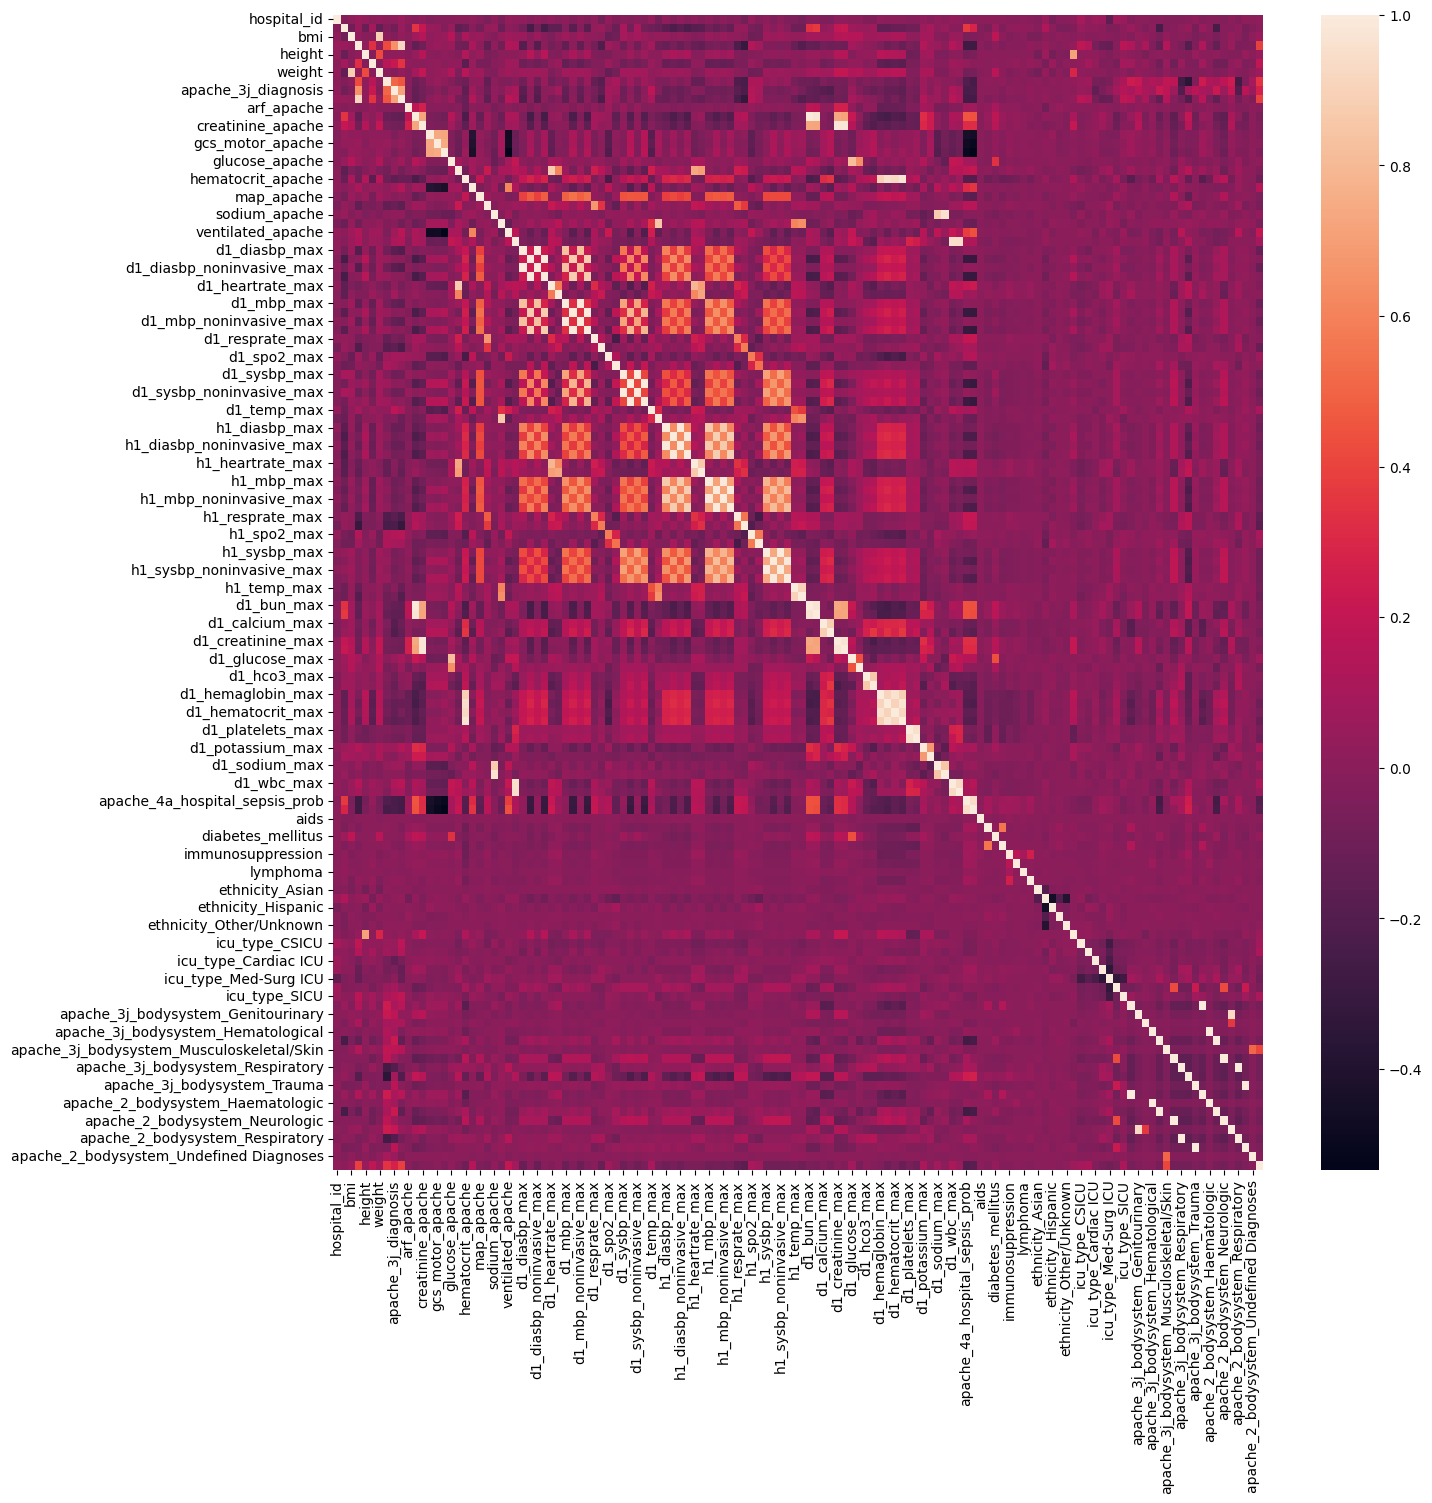

In [43]:
# Plotting the heatmap for analyzing the correlations between different Independent variables.

plt.figure(figsize=(15,15))
sns.heatmap(corr_matrix)

In [44]:
upper=corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(bool))

# The purpose of extracting the upper triangular portion of the correlation matrix is to eliminate redundancy in the 
# visualization of the heatmap. Since the correlation matrix is symmetric (correlation between variable X and 
# variable Y is the same as the correlation between variable Y and variable X), plotting the full matrix would display 
# the same information twice. By extracting the upper triangular portion, you only visualize the unique correlations 
# between variables once. This can be useful for larger correlation matrices where visualization of the full matrix can be 
# redundant and cluttered.

In [45]:
# Displaying the upper triangular portion of the correlation matrix.

upper

,hospital_id,age,bmi,elective_surgery,height,pre_icu_los_days,weight,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bun_apache,creatinine_apache,gcs_eyes_apache,gcs_motor_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,resprate_apache,sodium_apache,temp_apache,ventilated_apache,wbc_apache,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,...,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,apache_4a_hospital_sepsis_prob,apache_4a_icu_sepsis_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,ethnicity_Asian,ethnicity_Caucasian,ethnicity_Hispanic,ethnicity_Native American,ethnicity_Other/Unknown,gender_M,icu_type_CSICU,icu_type_CTICU,icu_type_Cardiac ICU,icu_type_MICU,icu_type_Med-Surg ICU,icu_type_Neuro ICU,icu_type_SICU,apache_3j_bodysystem_Gastrointestinal,apache_3j_bodysystem_Genitourinary,apache_3j_bodysystem_Gynecological,apache_3j_bodysystem_Hematological,apache_3j_bodysystem_Metabolic,apache_3j_bodysystem_Musculoskeletal/Skin,apache_3j_bodysystem_Neurological,apache_3j_bodysystem_Respiratory,apache_3j_bodysystem_Sepsis,apache_3j_bodysystem_Trauma,apache_2_bodysystem_Gastrointestinal,apache_2_bodysystem_Haematologic,apache_2_bodysystem_Metabolic,apache_2_bodysystem_Neurologic,apache_2_bodysystem_Renal/Genitourinary,apache_2_bodysystem_Respiratory,apache_2_bodysystem_Trauma,apache_2_bodysystem_Undefined Diagnoses,apache_2_bodysystem_Undefined diagnoses
hospital_id,NaN,-0.023046,0.014703,0.049647,0.033495,-0.000866,0.027434,0.005550,0.017585,0.047964,0.000385,-0.008449,0.013198,-0.026168,-0.013921,-0.009046,-0.007863,-0.001770,-0.000898,0.016270,-0.012759,-0.054585,0.003439,-0.059842,0.034473,0.019394,0.012832,-0.015559,0.012855,-0.015755,0.019620,-0.014032,0.005818,-0.030437,0.006060,-0.030315,0.014507,-0.083630,0.025829,-0.033792,-0.009972,-0.029607,-0.009554,-0.029469,0.034897,-0.080696,0.019332,-0.025912,0.019883,-0.022735,...,-0.015735,-0.014463,0.021034,-0.011867,0.023314,-0.002739,0.023601,0.018441,-0.011255,0.001336,-0.003196,0.007668,0.004331,0.002292,-0.008219,-0.009682,0.002801,-0.007692,-0.019434,0.048282,-0.070106,-0.008408,-0.006511,0.010381,0.096917,0.019547,0.063454,0.054071,-0.151043,0.066156,0.055449,-0.022047,-0.006083,-0.002519,-0.007910,-0.012637,-0.019986,-0.018626,-0.022033,-0.011496,0.017696,-0.022047,-0.007910,-0.012637,-0.018626,-0.006110,-0.022033,0.017696,-0.004668,0.020737
age,NaN,NaN,-0.102192,0.054517,-0.123064,0.090182,-0.148448,-0.035333,-0.088868,0.045835,-0.019419,0.341147,0.206540,0.042142,0.035899,-0.021180,0.045058,-0.161223,-0.121132,-0.008750,-0.076555,0.031430,0.042749,-0.113531,0.006724,-0.011917,-0.073898,-0.251466,-0.073416,-0.251180,-0.154576,-0.151041,-0.014250,-0.172263,-0.014217,-0.172481,0.031633,0.051329,-0.029938,-0.113899,0.104631,-0.075637,0.104315,-0.075678,-0.097403,-0.116708,-0.168123,-0.216529,-0.166813,-0.216744,...,-0.093327,-0.089623,0.059987,0.096343,0.012355,0.043858,-0.012156,-0.010676,0.370176,0.287048,-0.029523,-0.051575,0.062383,-0.041095,0.015256,0.023833,0.023565,0.015007,-0.015324,0.133420,-0.004201,-0.058009,-0.055233,-0.033870,0.044803,0.019473,0.022132,0.010991,-0.048026,-0.034154,0.000056,0.052025,-0.000199,-0.040840,-0.004004,-0.246271,-0.025596,-0.010478,0.015582,0.041272,-0.062335,0.052025,-0.004004,-0.246271,-0.010478,-0.012919,0.015582,-0.062335,-0.030036,0.006091
bmi,NaN,NaN,NaN,0.028267,-0.012171,-0.009129,0.880394,0.008191,-0.033975,0.030399,-0.004010,0.081152,0.155061,0

In [46]:
# Bench Mark 0.9

In [47]:
high_corr = [col for col in upper.columns if any(upper[col]>=0.9)]

# The resulting high_corr list will contain the column names of variables that have high correlations 
# (greater than or equal to 0.9) with at least one other variable in the DataFrame upper.

In [48]:
# Displaying high_corr list which contain the column names of variables that have high correlations.

high_corr

['apache_post_operative',
 'd1_diasbp_noninvasive_max',
 'd1_diasbp_noninvasive_min',
 'd1_mbp_noninvasive_max',
 'd1_mbp_noninvasive_min',
 'd1_sysbp_noninvasive_max',
 'd1_sysbp_noninvasive_min',
 'h1_diasbp_noninvasive_max',
 'h1_diasbp_noninvasive_min',
 'h1_mbp_noninvasive_max',
 'h1_mbp_noninvasive_min',
 'h1_sysbp_noninvasive_max',
 'h1_sysbp_noninvasive_min',
 'd1_bun_max',
 'd1_bun_min',
 'd1_creatinine_max',
 'd1_creatinine_min',
 'd1_hemaglobin_min',
 'd1_hematocrit_max',
 'd1_hematocrit_min',
 'd1_platelets_min',
 'd1_sodium_min',
 'd1_wbc_max',
 'd1_wbc_min',
 'apache_4a_icu_sepsis_prob',
 'apache_2_bodysystem_Gastrointestinal',
 'apache_2_bodysystem_Haematologic',
 'apache_2_bodysystem_Metabolic',
 'apache_2_bodysystem_Neurologic',
 'apache_2_bodysystem_Renal/Genitourinary',
 'apache_2_bodysystem_Respiratory',
 'apache_2_bodysystem_Trauma']

In [49]:
# Checking the number of elements in the high_corr list (gives the count of columns in the DataFrame uppper).

len(high_corr)

32

In [50]:
# Checking the dimensions of Independent variable.

x.shape

(27795, 130)

In [51]:
# Droppping the columns present in high_corr by assigning it to a new variable x1.

x1=x.drop(high_corr, axis=1)

In [52]:
# Checking the dimensions of remaining Independent variables.

x1.shape

(27795, 98)

In [53]:
# Displaying the DataFrame of Independent variables.

x1.head()

,hospital_id,age,bmi,elective_surgery,height,pre_icu_los_days,weight,apache_2_diagnosis,apache_3j_diagnosis,arf_apache,bun_apache,creatinine_apache,gcs_eyes_apache,gcs_motor_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,resprate_apache,sodium_apache,temp_apache,ventilated_apache,wbc_apache,d1_diasbp_max,d1_diasbp_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_max,d1_mbp_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_max,d1_sysbp_min,d1_temp_max,d1_temp_min,h1_diasbp_max,h1_diasbp_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_max,h1_mbp_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_max,h1_sysbp_min,h1_temp_max,h1_temp_min,d1_calcium_max,d1_calcium_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_platelets_max,d1_potassium_max,d1_potassium_min,d1_sodium_max,apache_4a_hospital_sepsis_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,ethnicity_Asian,ethnicity_Caucasian,ethnicity_Hispanic,ethnicity_Native American,ethnicity_Other/Unknown,gender_M,icu_type_CSICU,icu_type_CTICU,icu_type_Cardiac ICU,icu_type_MICU,icu_type_Med-Surg ICU,icu_type_Neuro ICU,icu_type_SICU,apache_3j_bodysystem_Gastrointestinal,apache_3j_bodysystem_Genitourinary,apache_3j_bodysystem_Gynecological,apache_3j_bodysystem_Hematological,apache_3j_bodysystem_Metabolic,apache_3j_bodysystem_Musculoskeletal/Skin,apache_3j_bodysystem_Neurological,apache_3j_bodysystem_Respiratory,apache_3j_bodysystem_Sepsis,apache_3j_bodysystem_Trauma,apache_2_bodysystem_Undefined Diagnoses,apache_2_bodysystem_Undefined diagnoses
0,118,68.0,22.730000,0,180.3,0.541667,73.9,113.0,502.01,0.0,31.0,2.51,3.0,6.0,4.0,168.0,118.0,27.4,0.0,40.0,36.0,134.0,39.3,0.0,14.1,68.0,37.0,119.0,72.0,89.0,46.0,34.0,10.0,100.0,74.0,131.0,73.0,39.9,37.2,68.0,63.0,119.0,108.0,86.0,85.0,26.0,18.0,100.0,74.0,131.0,115.0,39.5,37.5,8.5,7.4,168.0,109.0,19.0,15.0,8.9,233.0,4.0,3.4,136.0,0.10,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,81,77.0,27.420000,0,160.0,0.927778,70.2,108.0,203.01,0.0,9.0,0.56,1.0,3.0,1.0,145.0,120.0,36.9,0.0,46.0,33.0,145.0,35.1,1.0,12.7,95.0,31.0,118.0,72.0,120.0,38.0,32.0,12.0,100.0,70.0,159.0,67.0,36.3,35.1,61.0,48.0,114.0,100.0,85.0,57.0,31.0,28.0,95.0,70.0,95.0,71.0,36.3,36.3,8.6,8.0,145.0,128.0,27.0,26.0,11.3,557.0,4.2,3.8,145.0,0.47,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
5,83,67.0,27.560000,0,190.5,0.000694,100.0,301.0,403.01,0.0,13.0,0.71,4.0,6.0,5.0,156.0,113.0,44.2,0.0,130.0,35.0,137.0,36.6,0.0,10.9,100.0,61.0,113.0,83.0,127.0,80.0,32.0,10.0,97.0,91.0,173.0,107.0,36.8,36.6,89.0,89.0,83.0,83.0,111.0,111.0,12.0,12.0,97.0,97.0,143.0,143.0,36.7,36.7,8.8,8.8,156.0,125.0,27.0,27.0,15.6,159.0,3.9,3.7,137.0,0.05,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
17,118,46.0,25.845717,0,167.6,0.000000,72.6,108.0,203.01,0.0,15.0,1.00,1.0,4.0,1.0,143.0,114.0,44.2,1.0,113.0,34.0,132.0,36.4,1.0,9.7,89.0,61.0,98.0,64.0,113.0,76.0,22.0,9.0,100.0,88.0,169.0,102.0,37.1,36.4,89.0,63.0,94.0,80.0,104.0,88.0,21.0,9.0,99.0,95.0,169.0,115.0,36.6,36.6,8.5,8.5,143.0,143.0,27.0,27.0,15.0,247.0,4.9,4.9,132.0,0.11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
23,118,87.0,21.963763,0,180.3,5.046528,71.4,113.0,501.05,0.0,13.0,0.94,3.0,6.0,1.0,105.0,99.0,28.9,0.0,133.0,33.0,146.0,36.3,1.0,9.9,88.0,65.0,116.0,74.0,123.0,90.0,36.0,16.0,100.0,90.0,179.0,129.0,36.8,35.6,71.0,65.0,116.0,92.0,102.0,90.0,36.0,28.0,99.0,90.0,159.0,129.0,36.8,36.3,7.7,7.7,144.0,87.0,26.0,26.0,9.7,273.0,3.4,3.3,146.0,0.31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


### Confidence Interval :

In [54]:
# Importing the library :

import scipy.stats as st

In [55]:
# Calculating the confidence interval for the mean of the "age" column in the DataFrame x1 using the 
# normal (Gaussian) distribution from the scipy.stats module. The confidence level, which is 0.95 (95% confidence interval),
# it means that we want to be 95% confident that the true population mean lies within the calculated interval.

st.norm.interval(alpha=0.95, loc=np.mean(x1["age"]), scale=st.sem(x1["age"]))

(62.471691549087915, 62.85962703339094)

In [56]:
# Again, the confidence level, which is 0.90 (90% confidence interval),
# it means that we want to be 90% confident that the true population mean lies within the calculated interval.

st.norm.interval(alpha=0.90, loc=np.mean(x1["age"]), scale=st.sem(x1["age"]))

(62.50287643058172, 62.828442151897136)

In [57]:
# Again, the confidence level, which is 0.99 (99% confidence interval),
# it means that we want to be 99% confident that the true population mean lies within the calculated interval.

st.norm.interval(alpha=0.99, loc=np.mean(x1["age"]), scale=st.sem(x1["age"]))

(62.41074246719669, 62.92057611528217)

In [58]:
# QQ plot is also used to check the Normal Distribution.

In [59]:
# Importing the module which is a part of the StatsModels library, and is used for statistical modeling and hypothesis testing.

from statsmodels.graphics.gofplots import qqplot

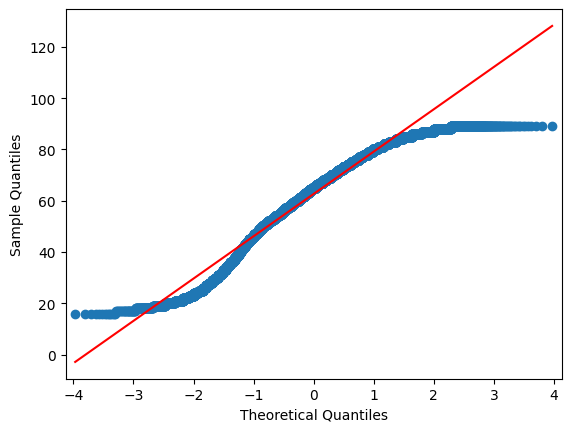

In [60]:
# The Q-Q plot will help to assess whether the data in the "age" column follows a normal distribution.

qqplot(x1["age"], line="s")
plt.show()

<AxesSubplot: xlabel='age', ylabel='Count'>

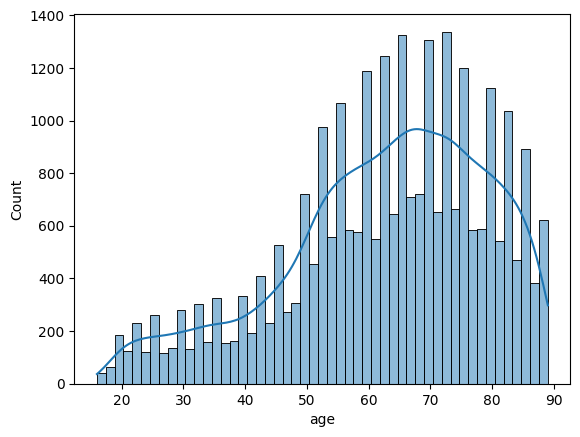

In [61]:
# Creating a histogram and a kernel density estimate (KDE) plot for the "age" column in the DataFrame x1.

sns.histplot(x=x1["age"], kde=True)

In [62]:
# Performing the Shapiro-Wilk test for normality on the DataFrame x1.

st.shapiro(x1.age)

ShapiroResult(statistic=0.9591078758239746, pvalue=0.0)

##### p is less than 0.05 we are able to reject null hypothesis.
##### H0 = The age column is normally distributed.
##### H1 = The age column is not normally distributed.

### Conclusion : The age column is not normally distributed.

In [63]:
# Selecting the best features for EDA or interpretation.

In [64]:
# Importing the modules for performing feature selection :

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2,f_classif,mutual_info_classif

In [65]:
# Performing feature selection using the SelectKBest method with the mutual_info_classif score function.

bestfeatures= SelectKBest(score_func=mutual_info_classif)
best_features= bestfeatures.fit(x1,y)

In [66]:
# Displaying the features :

best_features

SelectKBest(score_func=<function mutual_info_classif at 0x000002776764EDD0>)

In [67]:
# This DataFrame will contain the mutual information scores for each feature in the DataFrame x1.

dfscores = pd.DataFrame(best_features.scores_)
dfscores

,0
0,0.002401
1,0.001837
2,0.000000
3,0.006700
4,0.000669
5,0.001521
6,0.002668
7,0.034929
8,0.039941
9,0.000000


In [68]:
dfcolumns=pd.DataFrame(x1.columns)

# After this, DataFrame will have one column, and each row in the DataFrame will represent the name of a feature (column) 
# in x1. The column names from x1 will be preserved in the order they appear in the DataFrame.

In [69]:
# Concatinating the two DataFrames :

features_score = pd.concat([dfcolumns,dfscores], axis=1)
features_score

,0,0
0,hospital_id,0.002401
1,age,0.001837
2,bmi,0.000000
3,elective_surgery,0.006700
4,height,0.000669
5,pre_icu_los_days,0.001521
6,weight,0.002668
7,apache_2_diagnosis,0.034929
8,apache_3j_diagnosis,0.039941
9,arf_apache,0.000000


In [70]:
# 

features_score.columns= ["Features","Scores"]
features_score

,Features,Scores
0,hospital_id,0.002401
1,age,0.001837
2,bmi,0.000000
3,elective_surgery,0.006700
4,height,0.000669
5,pre_icu_los_days,0.001521
6,weight,0.002668
7,apache_2_diagnosis,0.034929
8,apache_3j_diagnosis,0.039941
9,arf_apache,0.000000


In [71]:
# 

best_features = features_score.nlargest(20,"Scores")
best_features

,Features,Scores
64,apache_4a_hospital_sepsis_prob,0.088022
8,apache_3j_diagnosis,0.039941
13,gcs_motor_apache,0.036213
7,apache_2_diagnosis,0.034929
12,gcs_eyes_apache,0.031308
14,gcs_verbal_apache,0.026204
23,ventilated_apache,0.025808
36,d1_sysbp_min,0.024948
38,d1_temp_min,0.024415
10,bun_apache,0.021894


In [73]:
# Dependence plot

In [74]:
from sklearn.inspection import PartialDependenceDisplay

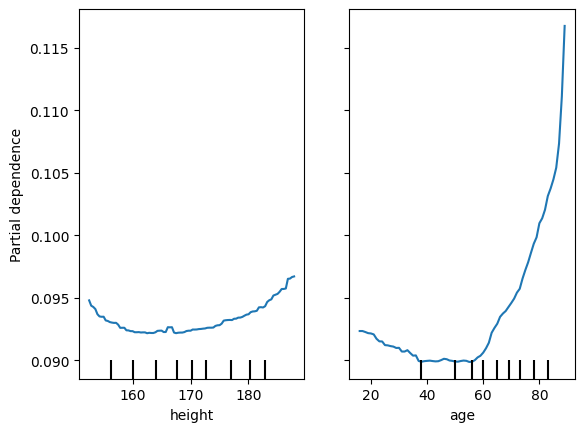

In [75]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
model = rf.fit(x1,y)
disp1=PartialDependenceDisplay.from_estimator(model,x1,["height","age"])
plt.show()

In [76]:
# Scale the dataset

In [77]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
x_scaled = scale.fit_transform(x1)
x_scaled = pd.DataFrame(x_scaled, columns=x1.columns)
x_scaled.head()

,hospital_id,age,bmi,elective_surgery,height,pre_icu_los_days,weight,apache_2_diagnosis,apache_3j_diagnosis,arf_apache,bun_apache,creatinine_apache,gcs_eyes_apache,gcs_motor_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,resprate_apache,sodium_apache,temp_apache,ventilated_apache,wbc_apache,d1_diasbp_max,d1_diasbp_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_max,d1_mbp_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_max,d1_sysbp_min,d1_temp_max,d1_temp_min,h1_diasbp_max,h1_diasbp_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_max,h1_mbp_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_max,h1_sysbp_min,h1_temp_max,h1_temp_min,d1_calcium_max,d1_calcium_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_platelets_max,d1_potassium_max,d1_potassium_min,d1_sodium_max,apache_4a_hospital_sepsis_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,ethnicity_Asian,ethnicity_Caucasian,ethnicity_Hispanic,ethnicity_Native American,ethnicity_Other/Unknown,gender_M,icu_type_CSICU,icu_type_CTICU,icu_type_Cardiac ICU,icu_type_MICU,icu_type_Med-Surg ICU,icu_type_Neuro ICU,icu_type_SICU,apache_3j_bodysystem_Gastrointestinal,apache_3j_bodysystem_Genitourinary,apache_3j_bodysystem_Gynecological,apache_3j_bodysystem_Hematological,apache_3j_bodysystem_Metabolic,apache_3j_bodysystem_Musculoskeletal/Skin,apache_3j_bodysystem_Neurological,apache_3j_bodysystem_Respiratory,apache_3j_bodysystem_Sepsis,apache_3j_bodysystem_Trauma,apache_2_bodysystem_Undefined Diagnoses,apache_2_bodysystem_Undefined diagnoses
0,0.574257,0.712329,0.148859,0.0,0.738140,0.011390,0.239484,0.057971,0.190949,0.0,0.219512,0.203125,0.666667,1.0,0.75,0.230481,0.594595,0.318182,0.0,0.00000,0.571429,0.414634,0.947368,0.0,0.293987,0.184874,0.311688,0.512605,0.503497,0.233871,0.266667,0.256410,0.250,1.000000,0.74,0.288732,0.268908,1.000000,0.898494,0.292453,0.450549,0.618644,0.666667,0.318966,0.500000,0.326531,0.152542,1.000000,0.74,0.378378,0.439716,1.000000,0.718750,0.500000,0.395833,0.176580,0.298039,0.250000,0.25000,0.201923,0.369176,0.285714,0.294118,0.371429,0.555556,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.391089,0.835616,0.237400,0.0,0.390478,0.017132,0.214383,0.033816,0.048571,0.0,0.040650,0.023897,0.000000,0.4,0.00,0.189387,0.608108,0.588068,0.0,0.03750,0.517857,0.682927,0.394737,1.0,0.262806,0.411765,0.233766,0.504202,0.503497,0.483871,0.177778,0.230769,0.300,1.000000,0.70,0.485915,0.218487,0.250000,0.543224,0.226415,0.285714,0.576271,0.592593,0.310345,0.235849,0.428571,0.237288,0.944444,0.70,0.135135,0.127660,0.475410,0.531250,0.521739,0.520833,0.133829,0.372549,0.535714,0.59375,0.432692,0.949821,0.333333,0.411765,0.628571,0.742424,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.400990,0.698630,0.240043,0.0,0.912828,0.003346,0.416554,0.966184,0.143807,0.0,0.073171,0.037684,1.000000,1.0,1.00,0.209041,0.560811,0.795455,0.0,0.56250,0.553571,0.487805,0.592105,0.0,0.222717,0.453782,0.623377,0.462185,0.580420,0.540323,0.644444,0.230769,0.250,0.965517,0.91,0.584507,0.554622,0.354167,0.796989,0.490566,0.736264,0.313559,0.435185,0.534483,0.745283,0.040816,0.101695,0.966667,0.97,0.459459,0.638298,0.540984,0.593750,0.565217,0.687500,0.154275,0.360784,0.535714,0.62500,0.846154,0.236559,0.261905,0.382353,0.400000,0.530303,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.574257,0.410959,0.207679,0.0,0.520637,0.003336,0.230665,0.033816,0.048571,0.0,0.089431,0.064338,0.000000,0.6,0.00,0.185814,0.567568,0.795455,1.0,0.45625,0.535714,0.365854,0.565789,1.0,0.195991,0.361345,0.623377,0.336134,0.447552,0.427419,0.600000,0.102564,0.225,1.000000,0

In [78]:
x_scaled.corrwith(y)

hospital_id                                 -0.018689
age                                         -0.009518
bmi                                          0.006779
elective_surgery                            -0.011217
height                                      -0.011496
pre_icu_los_days                            -0.001166
weight                                       0.001936
apache_2_diagnosis                           0.000222
apache_3j_diagnosis                         -0.011126
arf_apache                                  -0.004057
bun_apache                                  -0.007310
creatinine_apache                           -0.011885
gcs_eyes_apache                             -0.009086
gcs_motor_apache                            -0.007279
gcs_verbal_apache                           -0.012828
glucose_apache                              -0.010924
heart_rate_apache                           -0.004311
hematocrit_apache                           -0.000382
intubated_apache            

In [79]:
# Train Test Split:

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=100, stratify=y)

In [80]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, GradientBoostingClassifier 

In [81]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [83]:
model= rf.fit(x_train, y_train)

In [84]:
y_predict = model.predict(x_test)

In [85]:
accuracy_score(y_test, y_predict)

0.9215686274509803

In [86]:
confusion_matrix(y_test, y_predict)

array([[4996,   56],
       [ 380,  127]], dtype=int64)

In [87]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      5052
           1       0.69      0.25      0.37       507

    accuracy                           0.92      5559
   macro avg       0.81      0.62      0.66      5559
weighted avg       0.91      0.92      0.90      5559



In [88]:
# balance the dataset

In [89]:
from imblearn.over_sampling import SMOTE, ADASYN, RandomOverSampler, BorderlineSMOTE, SVMSMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss

In [90]:
smote = SMOTE()
under = RandomUnderSampler()

In [91]:
# We only balance the training dataset not whole dataset.

In [92]:
# SMOTE Approach :

In [93]:
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)

In [94]:
y_train_smote.value_counts()

0    20207
1    20207
Name: septic_shock, dtype: int64

In [95]:
y_train.value_counts()

0    20207
1     2029
Name: septic_shock, dtype: int64

In [96]:
# Undersampling Approach :

In [97]:
x_train_under, y_train_under = under.fit_resample(x_train, y_train)

In [98]:
y_train_under.value_counts()

0    2029
1    2029
Name: septic_shock, dtype: int64

In [99]:
x_train_under.shape

(4058, 98)